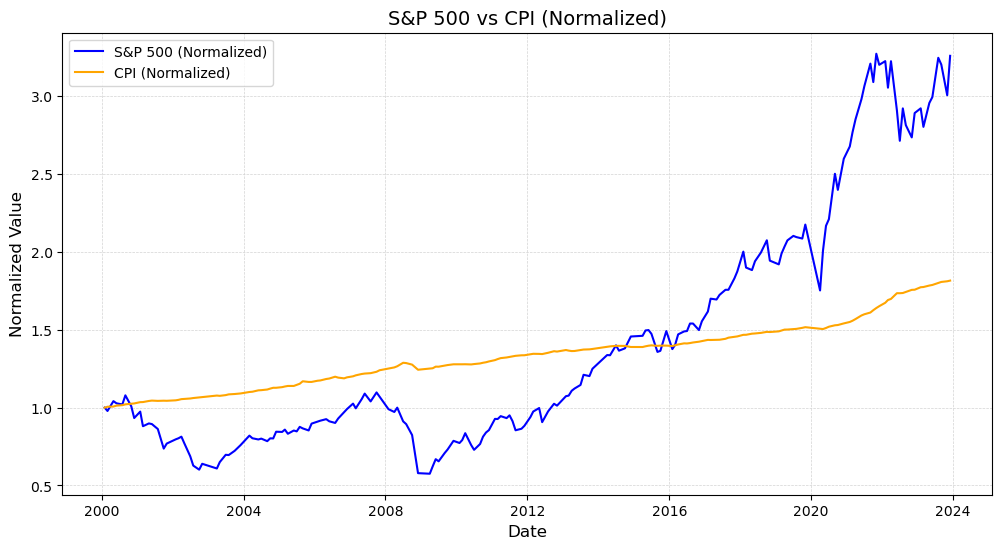

Correlation between S&P 500 returns and CPI changes: 0.2784


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

class SP500CPIAnalysis:
    def __init__(self, sp500_file='sp500_data.csv', cpi_file='cpi_data.csv'):
        """
        Initialize the analysis object with file paths for S&P 500 and CPI datasets.
        """
        self.sp500_file = sp500_file
        self.cpi_file = cpi_file

        self.sp500_data = None
        self.cpi_data = None
        self.merged_data = None

    def load_data(self):
        """
        Load and preprocess the S&P 500 and CPI datasets.
        """
        # Load data
        self.sp500_data = pd.read_csv(self.sp500_file)
        self.cpi_data = pd.read_csv(self.cpi_file)

        # Convert date columns to datetime format
        self.sp500_data['Date'] = pd.to_datetime(self.sp500_data['Date'])
        self.cpi_data['DATE'] = pd.to_datetime(self.cpi_data['DATE'])

        # Rename columns for consistency
        self.cpi_data.rename(columns={'DATE': 'Date', 'CPIAUCSL': 'CPI'}, inplace=True)

    def merge_data(self):
        """
        Merge S&P 500 and CPI datasets on the Date column.
        """
        self.merged_data = pd.merge(
            self.sp500_data,
            self.cpi_data,
            on='Date',
            how='inner'
        )

        # Calculate daily returns for the S&P 500
        self.merged_data['SP500_Return'] = self.merged_data['Close'].pct_change()

    def normalize_data(self):
        """
        Normalize S&P 500 closing prices and CPI for comparison.
        """
        self.merged_data['SP500_Normalized'] = self.merged_data['Close'] / self.merged_data['Close'].iloc[0]
        self.merged_data['CPI_Normalized'] = self.merged_data['CPI'] / self.merged_data['CPI'].iloc[0]

    def plot_data(self):
        """
        Plot normalized S&P 500 closing prices and CPI over time.
        """
        plt.figure(figsize=(12, 6))
        plt.plot(self.merged_data['Date'], self.merged_data['SP500_Normalized'], label='S&P 500 (Normalized)', color='blue')
        plt.plot(self.merged_data['Date'], self.merged_data['CPI_Normalized'], label='CPI (Normalized)', color='orange')
        plt.title('S&P 500 vs CPI (Normalized)', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Normalized Value', fontsize=12)
        plt.legend()
        plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
        plt.show()

    def calculate_correlation(self):
        """
        Calculate the correlation between S&P 500 returns and CPI changes.
        """
        self.merged_data['CPI_Change'] = self.merged_data['CPI'].pct_change()
        correlation = self.merged_data[['SP500_Return', 'CPI_Change']].corr().iloc[0, 1]
        print(f"Correlation between S&P 500 returns and CPI changes: {correlation:.4f}")

    def run(self):
        """
        Execute the full workflow.
        """
        self.load_data()
        self.merge_data()
        self.normalize_data()
        self.plot_data()
        self.calculate_correlation()


if __name__ == "__main__":
    analysis = SP500CPIAnalysis()
    analysis.run()



---

## 1. CPI (Consumer Price Index)

### What It Is
- The CPI measures the average change in prices paid by consumers for a basket of goods and services over time.
- It is a key indicator of inflation and cost-of-living changes.

### Why It’s Important
- CPI helps economists, policymakers, and investors understand inflation trends.
- Rising CPI indicates inflation, meaning the purchasing power of money decreases.
- Changes in CPI can influence interest rates, stock market trends, and economic policies.

### How It’s Calculated
1. Identify a fixed basket of goods and services typically consumed by households.
2. Track the price of each item in the basket over time.
3. Calculate the cost of the basket for a given period.
4. Compare the cost to a base year and express the change as a percentage.

Mathematically:  

$$
CPI = \frac{
    \sum_{i=1}^{n} 
    \left( \frac{
        \text{Price of Basket in Current Year}_i
    }{
        \text{Price of Basket in Base Year}_i
    } \right)
}{n} \times 100
$$

Where:
- **Cost of Basket at Current Period**: Sum of current prices of all items in the basket.
- **Cost of Basket at Base Period**: Sum of prices of the same items in the base year.

---
Fernando, J. (2024b, 24 oktober). Consumer Price Index (CPI): What It Is and How It's Used. Investopedia. https://www.investopedia.com/terms/c/consumerpriceindex.asp 